In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import Operating System Module
import os

#### The related datasets include:

1. NORTH AMERICA NEWS SOURCES:

    This database contains News Sentiment analysis of each news for the past years. Participants can query keywords and find the right sentiment index. We have preselected "Exxon" as a relevant indicator.

2. COMMODITY PRICES

    This database covers the global price for Ice Brent Crude Oil, WTI Crude Oil with different measures Change, Volume, Settle, Open, Low and Value.

3. GLOBAL STOCK EXCHANGE DATA

    This dataset comprises daily stock market data from the New York Stock Exchange and covers Exxon, BP and Chevron companies closing prices.

4. STOCK MARKET INDICATORS & INDEX

    This covers the daily index for Dow Jones Transportation, Dow Jones Utility, S&P 500 and others.

5. FINANCIAL STATEMENT

    This is a company’s financial statement published in SEC. It covers the Balance Sheet, Cash Flow and Income Statement.


---
1. NORTH AMERICA NEWS SOURCES:

    This database contains News Sentiment analysis of each news for the past years. Participants can query keywords and find the right sentiment index. We have preselected "Exxon" as a relevant indicator.

In [2]:
news_df = pd.read_csv('../data/ave-daily-news-sentiment-exxon-2020.csv',
                      #index_col = 'DateTime', # parse_dates needs a datetime index to work
                      #parse_dates=[0], # Combine cols & parse as a single date column
                      #parse_dates=True, # Try parsing the index
                      infer_datetime_format=True) # Attempt to infer format & switch to fastest parsing
display(news_df.info())
news_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DateTime              101 non-null    object 
 1   Daily News Sentiment  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,DateTime,Daily News Sentiment
0,12/31/2020 0:00,-0.1
1,12/30/2020 0:00,-0.4
2,12/29/2020 0:00,-0.5
3,12/24/2020 0:00,-0.2
4,12/22/2020 0:00,0.3


In [3]:
news_df = pd.read_csv('../data/ave-daily-news-sentiment-exxon-2020.csv')
news_df.DateTime = pd.to_datetime(news_df.DateTime, 
                                  format = '%m/%d/%Y %H:%M')
display(news_df.info())
news_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DateTime              101 non-null    datetime64[ns]
 1   Daily News Sentiment  101 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


None

,DateTime,Daily News Sentiment
0,2020-12-31,-0.1
1,2020-12-30,-0.4
2,2020-12-29,-0.5
3,2020-12-24,-0.2
4,2020-12-22,0.3


In [4]:
news_df['DateTime'].value_counts().sort_index()

2020-01-02    1
2020-01-03    1
2020-01-04    1
2020-01-24    1
2020-01-26    1
             ..
2020-12-22    1
2020-12-24    1
2020-12-29    1
2020-12-30    1
2020-12-31    1
Name: DateTime, Length: 101, dtype: int64

---
### 2. COMMODITY PRICES

    This database covers the global price for Ice Brent Crude Oil, WTI Crude Oil with different measures Change, Volume, Settle, Open, Low and Value.

FUTURES: Measures Indicator Meaning
* Change: Difference in Settle Price from previous trading session.
* Open: Price of the 1st transaction of the day.
* Open Interest: Number of open/outstanding contracts.
* Settle: Price of last transaction of the day.
* Low: Low price for contract during trading session.

* Volume: Number of contracts that have changed hands during trading session.


In [5]:
# Sub-Sector: COMMODITY PRICES
# Super Region: GLOBAL DATA
# Frequency = DAILY
# Source = COMMODITY EXCHANGE
comm_df = pd.read_csv('../data/crude-oil-commodity-prices-2020.csv',
                      parse_dates=['Date'],
                      infer_datetime_format=True)

display(comm_df.head())
print('Value data')
comm_df.Value.describe()

,Value,Date,Sub-Sector,Super Region,Commodity And Exchange,Frequency,Source,Indicator
0,0.12,2020-12-31,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,CHANGE
1,364939.00,2020-12-31,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,PREVIOUS DAY OPEN INTEREST
2,48.35,2020-12-31,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,OPEN
3,48.52,2020-12-31,COMMODITY PRICES,GLOBAL DATA,NYMEX CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,SETTLE
4,0.17,2020-12-31,COMMODITY PRICES,GLOBAL DATA,ICE BRENT CRUDE OIL FUTURES,DAILY,COMMODITY EXCHANGE,CHANGE


Value data


count      2014.000000
mean      69752.660437
std      146232.528589
min         -37.630000
25%           5.545000
50%          41.290000
75%          59.547500
max      658933.000000
Name: Value, dtype: float64

In [6]:
comm_df.groupby([ 'Indicator', 'Commodity And Exchange']).describe()

Value                 \
                                                        count           mean   
Indicator                  Commodity And Exchange                              
CHANGE                     ICE BRENT CRUDE OIL FUTURES  256.0      -0.085703   
                           NYMEX CRUDE OIL FUTURES      250.0       1.136360   
OPEN                       ICE BRENT CRUDE OIL FUTURES  259.0      43.343900   
                           NYMEX CRUDE OIL FUTURES      253.0      39.471502   
PREV# DAY OPEN INTEREST    ICE BRENT CRUDE OIL FUTURES  198.0  338239.010101   
PREVIOUS DAY OPEN INTEREST NYMEX CRUDE OIL FUTURES      253.0  290381.687747   
SETTLE                     ICE BRENT CRUDE OIL FUTURES  259.0      43.237297   
                           NYMEX CRUDE OIL FUTURES      253.0      39.344269   
VALUE                      BRENT CRUDE OIL               11.0      41.610909   
                           DUBAI CRUDE OIL               11.0      41.497273   
                           WTI CRUDE OIL                 11.0      38.714545   

                                                                       \
                                                                  std   
Indicator                  Commodity And Exchange                       
CHANGE                     ICE BRENT CRUDE OIL FUTURES       1.485338   
                           NYMEX CRUDE OIL FUTURES           4.768198   
OPEN                       ICE BRENT CRUDE OIL FUTURES      10.239790   
                           NYMEX CRUDE OIL FUTURES          10.794731   
PREV# DAY OPEN INTEREST    ICE BRENT CRUDE OIL FUTURES  134509.805653   
PREVIOUS DAY OPEN INTEREST NYMEX CRUDE OIL FUTURES      144953.723777   
SETTLE                     ICE BRENT CRUDE OIL FUTURES      10.230484   
                           NYMEX CRUDE OIL FUTURES          11.347522   
VALUE                      BRENT CRUDE OIL                  10.948594   
                           DUBAI CRUDE OIL                  10.816203   
                           WTI CRUDE OIL                    10.887552   

                                                                               \
                                                             min          25%   
Indicator                  Commodity And Exchange                               
CHANGE                     ICE BRENT CRUDE OIL FUTURES    -10.91      -0.7350   
                           NYMEX CRUDE OIL FUTURES         -3.01       0.0825   
OPEN                       ICE BRENT CRUDE OIL FUTURES     19.90      38.9800   
                           NYMEX CRUDE OIL FUTURES        -14.00      36.2600   
PREV# DAY OPEN INTEREST    ICE BRENT CRUDE OIL FUTURES  65624.00  236055.0000   
PREVIOUS DAY OPEN INTEREST NYMEX CRUDE OIL FUTURES      13044.00  190103.0000   
SETTLE                     ICE BRENT CRUDE OIL FUTURES     19.33      39.0450   
                           NYMEX CRUDE OIL FUTURES        -37.63      36.7600   
VALUE                      BRENT CRUDE OIL                 23.34      36.4550   
                           DUBAI CRUDE OIL                 23.38      36.7250   
                           WTI CRUDE OIL                   16.81      34.0900   

                                                                               \
                                                              50%         75%   
Indicator                  Commodity And Exchange                               
CHANGE                     ICE BRENT CRUDE OIL FUTURES       0.05       0.730   
                           NYMEX CRUDE OIL FUTURES           0.56       1.225   
OPEN                       ICE BRENT CRUDE OIL FUTURES      42.91      48.800   
                           NYMEX CRUDE OIL FUTURES          40.58      45.600   
PREV# DAY OPEN INTEREST    ICE BRENT CRUDE OIL FUTURES  341588.00  439636.500   
PREVIOUS DAY OPEN INTEREST NYMEX CRUDE OIL FUTURES      303081.00  393192.000   
SETTLE                     ICE BRENT CRUDE OIL F

In [7]:
#comm_df.groupby(['Indicator', 'Date']).describe().groupby(('Value', 'count')).describe()

---

In [8]:
# Sector: FINANCIAL MARKET
# Sub-Sector: ENERGY FUTURES PRICES
# Super Region: GLOBAL DATA
# Super Region.1: GLOBAL DATA
# Source = INTERCONTINENTAL EXCHANGE - ICE
# Unit: PRICE
# Time Level: DAILY
# Period Value: d
comm2_df = pd.read_csv('../data/crude-oil-related-product-future-prices-from-ice-2020.csv',
                      parse_dates=['Date Value'],
                      infer_datetime_format=True)
comm2_df.drop(columns=['Sector','Sub-Sector', 'Super Region', 'Super Region.1', 'Source','Unit','Time Level','Period Value'], inplace=True)

display(comm2_df.head())
print('Value data')
comm2_df.Value.describe()

,Product Id,ProductID_Contract,Exchange City,Product Type,Exchange Country,Product Description,Value,Date Value
0,1886,1886_JUN21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,NAPHTHA C+F JAPAN CARGO SWAP,455.28,2020-12-31
1,5631,5631_FEB21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,URALS MED VS DATED BRENT SWAP,-0.40,2020-12-31
2,5631,5631_APR21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,URALS MED VS DATED BRENT SWAP,-1.00,2020-12-31
3,20031,20031_APR21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,SINGAPORE GASOIL SWAP,56.73,2020-12-31
4,23490,23490_MAR21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,MARINE FUEL 0.5% FOB ROTTERDAM BARGE SWAP,370.50,2020-12-31


Value data


count    59100.000000
mean        57.308513
std        124.162466
min        -30.500000
25%         -2.550000
50%          0.880000
75%         43.000000
max        535.350000
Name: Value, dtype: float64

In [9]:
comm2_df.drop(columns='Product Id').groupby(['Product Type', 'Exchange Country','Exchange City']).describe()

Value  \
                                                                         count   
Product Type                   Exchange Country         Exchange City            
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE      43522.0   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE        632.0   
                               UNITED KINGDOM           LONDON         13671.0   
OIL                            UNITED STATES OF AMERICA NEW YORK        1275.0   

                                                                                   \
                                                                             mean   
Product Type                   Exchange Country         Exchange City               
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE       42.971641   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE      312.564842   
                               UNITED KINGDOM           LONDON          96.664878   
OIL                            UNITED STATES OF AMERICA NEW YORK        -1.823663   

                                                                                   \
                                                                              std   
Product Type                   Exchange Country         Exchange City               
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE      106.987922   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE      146.004226   
                               UNITED KINGDOM           LONDON         153.885926   
OIL                            UNITED STATES OF AMERICA NEW YORK         1.536258   

                                                                              \
                                                                         min   
Product Type                   Exchange Country         Exchange City          
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE     -30.50   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE      38.35   
                               UNITED KINGDOM           LONDON        -16.80   
OIL                            UNITED STATES OF AMERICA NEW YORK       -9.27   

                                                                                \
                                                                           25%   
Product Type                   Exchange Country         Exchange City            
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE       -3.000   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE      328.375   
                               UNITED KINGDOM           LONDON          -2.100   
OIL                            UNITED STATES OF AMERICA NEW YORK        -2.480   

                                                                                \
                                                                           50%   
Product Type                   Exchange Country         Exchange City            
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE       -0.035   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE      378.250   
                               UNITED KINGDOM           LONDON          37.590   
OIL                            UNITED STATES OF AMERICA NEW YORK        -1.420   

                                                                                 \
                                                                            75%   
Product Type                   Exchange Country         Exchange City             
CRUDE OIL AND REFINED          SINGAPORE                SINGAPORE       36.0300   
CRUDE OIL AND REFINED PRODUCTS SINGAPORE                SINGAPORE      402.8125   
                               UNITED KINGDOM           LONDON          49.2850   
OIL                            UNITED STATES OF AMERICA NEW YORK        -0.8200   

             

In [10]:
for col in comm2_df.drop(columns=['Product Type', 'Exchange Country','Exchange City', 'Date Value','Value']):
    print(col)
    display(comm2_df[col].value_counts())
    print()

Product Id


3193     3568
5629     2967
5631     2914
1885     2311
20031    2280
         ... 
2919       73
2460       73
124        65
95         63
20         42
Name: Product Id, Length: 84, dtype: int64


ProductID_Contract


20031_JAN21    255
495_MAR21      248
3193_FEB21     243
3193_MAY21     243
3193_MAR21     243
              ... 
5497_JUN21      22
20036_JUN21     20
5026_JAN22      13
5491_JUN21       6
20031_SEP21      6
Name: ProductID_Contract, Length: 555, dtype: int64


Product Description


USGC HSFO FUEL OIL VS BRENT 1ST LINE SWAP             3568
URALS NWE  VS DATED BRENT SWAP                        2967
URALS MED  VS DATED BRENT SWAP                        2914
NAPHTHA CIF NWE CARGOES VS BRENT 1ST LINE SWAP        2311
SINGAPORE GASOIL SWAP                                 2280
                                                      ... 
GASOIL 0.1% CIF MED CARGOES FUTURE                      73
GASOIL OUTRIGHT - SINGAPORE GASOIL (PLATTS) FUTURE      73
SINGAPORE JET KEROSENE SWAP                             65
SINGAPORE NAPHTHA FUTURE                                63
FUEL OIL 180 CST SINGAPORE SWAP                         42
Name: Product Description, Length: 84, dtype: int64

---
### 3. GLOBAL STOCK EXCHANGE DATA

    This dataset comprises daily stock market data from the New York Stock Exchange and covers Exxon, BP and Chevron companies closing prices.

In [11]:
# Super Region: GLOBAL DATA
# Time Level: DAILY
# Source: WORLDDATA.AI
# Sub-Sector: GLOBAL STOCK EXCHANGE DATA
# Stock Attribute: CLOSING PRICE
# Currency: USD
# Data Provider: NEW YORK STOCK EXCHANGE
# Stock Exchange: NEW YORK STOCK EXCHANGE - STOCK PRICES
# Location: AMERICA-NEW_YORK
closing_df = pd.read_csv('../data/nyse-energy-company-stock-closing-prices-2020.csv',
                         parse_dates=['Date'],
                         infer_datetime_format=True)
closing_df.drop(columns=['Super Region', 
                         'Time Level',
                         'Source',
                         'Sub-Sector',
                         'Stock Attribute',
                         'Currency',
                         'Data Provider',
                         'Stock Exchange',
                         'Location'],
                inplace=True)
closing_df.describe()

,Value
count,2502.000000
mean,49.040068
std,31.370197
min,3.180000
25%,23.692500
50%,42.320000
75%,69.222500
max,158.110000


In [12]:
closing_df.groupby(['Ticker', 'Stock Name']).describe()

Value                                \
                                          count        mean        std    min   
Ticker Stock Name                                                               
BP     BP P.L.C.                          262.0   24.218473   6.328784  14.90   
COP    CONOCOPHILLIPS                     254.0   41.685906   9.632494  24.39   
CVX    CHEVRON CORPORATION                249.0   88.575904  13.120206  53.63   
MPC    MARATHON PETROLEUM CORPORATION     249.0   37.805703   9.967099  16.61   
MRO    MARATHON OIL CORPORATION           249.0    6.435502   2.616399   3.18   
OXY    OCCIDENTAL PETROLEUM CORPORATION   248.0   19.409677  10.925228   8.88   
PSX    PHILLIPS 66                        248.0   68.381048  15.296465  42.32   
PXD    PIONEER NATURAL RESOURCES COMPANY  248.0  101.896815  21.580048  59.15   
VLO    VALERO ENERGY CORPORATION          248.0   58.859677  14.661226  32.97   
XOM    EXXON MOBIL CORPORATION            247.0   44.751498   9.724010  31.47   

                                                                            
                                             25%     50%       75%     max  
Ticker Stock Name                                                           
BP     BP P.L.C.                          20.525  23.005   24.7650   39.85  
COP    CONOCOPHILLIPS                     34.880  39.980   43.9525   66.48  
CVX    CHEVRON CORPORATION                81.640  88.360   93.3400  121.43  
MPC    MARATHON PETROLEUM CORPORATION     31.120  36.810   41.2200   61.91  
MRO    MARATHON OIL CORPORATION            4.530   5.740    6.8000   13.96  
OXY    OCCIDENTAL PETROLEUM CORPORATION   12.370  15.450   19.4050   47.26  
PSX    PHILLIPS 66                        58.170  65.205   75.1325  112.20  
PXD    PIONEER NATURAL RESOURCES COMPANY  88.130  96.780  111.6350  158.11  
VLO    VALERO ENERGY CORPORATION          49.705  56.335   65.5975   96.89  
XOM    EXXON MOBIL CORPORATION            38.145  43.140   46.6650   70.90

In [13]:
for col in closing_df.drop(columns=['Ticker', 'Stock Name']):
    print(col, '\tCount')
    display(closing_df[col].value_counts())
    print()

Value 	Count


32.74     6
47.42     5
31.29     4
51.44     4
122.78    4
         ..
59.43     1
104.89    1
15.13     1
90.13     1
39.75     1
Name: Value, Length: 2079, dtype: int64


Date 	Count


2020-09-01    10
2020-02-04    10
2020-06-17    10
2020-09-04    10
2020-03-19    10
              ..
2020-03-25     1
2020-03-12     1
2020-03-24     1
2020-03-27     1
2020-03-18     1
Name: Date, Length: 262, dtype: int64

---
### 4. STOCK MARKET INDICATORS & INDEX

    This covers the daily index for Dow Jones Transportation, Dow Jones Utility, S&P 500 and others.

In [14]:
# Sub-Sector: STOCK MARKET INDICATORS & INDEX
# Super Region: UNITED STATES
# Time Level: DAILY
# Category 2: FINANCIAL INDICATORS
# Seasonal Adjustment: NOT SEASONALLY ADJUSTED
# Unit: INDEX
# Source: FEDERAL RESERVE ECONOMIC DATA-FRED
indicators_df = pd.read_csv('../data/some-stock-market-indicators-&-index-2020.csv',
                            date_parser='Date',
                            infer_datetime_format=True)
indicators_df.drop(columns=['Sub-Sector',
                            'Super Region',
                            'Time Level',
                            'Category 2',
                            'Seasonal Adjustment',
                            'Unit',
                            'Source'],
                   inplace=True)
                        
display(indicators_df)
indicators_df.describe()

,Value,Date,Description
0,864.64,2020-12-31,DOW JONES UTILITY AVERAGE
1,3756.07,2020-12-31,S&P 500
2,10108.71,2020-12-31,DOW JONES COMPOSITE AVERAGE
3,30606.48,2020-12-31,DOW JONES INDUSTRIAL AVERAGE
4,12506.93,2020-12-31,DOW JONES TRANSPORTATION AVERAGE
...,...,...,...
1260,866.82,2020-01-02,DOW JONES UTILITY AVERAGE
1261,3257.85,2020-01-02,S&P 500
1262,9446.78,2020-01-02,DOW JONES COMPOSITE AVERAGE
1263,28868.80,2020-01-02,DOW JONES INDUSTRIAL AVERAGE


,Value
count,1265.000000
mean,10008.807123
std,9239.462509
min,610.890000
25%,3036.130000
50%,8408.050000
75%,11391.910000
max,30606.480000


In [15]:
indicators_df.groupby(['Description']).describe()

Value                                       \
                                  count          mean          std       min   
Description                                                                    
DOW JONES COMPOSITE AVERAGE       253.0   8848.416364   898.536760   6100.31   
DOW JONES INDUSTRIAL AVERAGE      253.0  26890.673597  2521.704536  18591.93   
DOW JONES TRANSPORTATION AVERAGE  253.0  10254.657115  1593.884018   6703.63   
DOW JONES UTILITY AVERAGE         253.0    832.432609    61.114421    610.89   
S&P 500                           253.0   3217.855929   319.225483   2237.40   

                                                                          
                                       25%       50%       75%       max  
Description                                                               
DOW JONES COMPOSITE AVERAGE        8271.80   9106.56   9550.49  10108.71  
DOW JONES INDUSTRIAL AVERAGE      25595.80  27480.03  28823.77  30606.48  
DOW JONES TRANSPORTATION AVERAGE   9010.92  10864.94  11391.91  12803.02  
DOW JONES UTILITY AVERAGE           795.09    826.52    875.22    960.89  
S&P 500                            3036.13   3276.02   3408.63   3756.07

In [16]:
for col in indicators_df.drop(columns=['Description']):
    print(col, '\tCount')
    display(indicators_df[col].value_counts())
    print()

Value 	Count


832.49      2
818.68      2
9151.03     1
3426.96     1
3124.74     1
           ..
2846.06     1
2948.51     1
27584.06    1
10887.56    1
875.19      1
Name: Value, Length: 1263, dtype: int64


Date 	Count


2020-05-14    5
2020-11-09    5
2020-02-07    5
2020-07-08    5
2020-04-14    5
             ..
2020-11-16    5
2020-05-28    5
2020-07-23    5
2020-08-28    5
2020-09-14    5
Name: Date, Length: 253, dtype: int64

---
### 5. FINANCIAL STATEMENT

    This is a company’s financial statement published in SEC. It covers the Balance Sheet, Cash Flow and Income Statement.

In [17]:
# Super Region: UNITED STATES
# Sector: FINANCIAL MARKET
# Time Level: QUARTER
# Source: COMPANY SEC FILINGS
# Exchange: NEW YORK STOCK EXCHANGE
# Sub-Sector: FINANCIAL STATEMENT
# Industry Level 1: ENERGY
# Statement Type: INCOME-STATEMENT
# Market Cap: GREATER THAN $1BILLION MARKET CAP
# Super Region.1: UNITED STATES
# Period Value: d
financial_df = pd.read_csv('../data/some-energy-company-financial-statements-2020.csv',
                          date_parser=['Date Value'],
                          infer_datetime_format=True)
financial_df.drop(columns=['Super Region',
                           'Sector',
                           'Time Level',
                           'Source',
                           'Exchange',
                           'Sub-Sector',
                           'Industry Level 1',
                           'Statement Type',
                           'Market Cap',
                           'Super Region.1',
                           'Period Value'],
                  inplace=True)
display(financial_df.head(3))

,Ticker,Unit,Company Name,Industry Level 2,Company Website,Financial Metric,Value,Date Value
0,VLO,USD,VALERO ENERGY CORPORATION,OIL & GAS - REFINING & MARKETING,HTTP://WWW.VALERO.COM,INCOME TAX EXPENSE,-3.370000e+08,9/30/2020
1,VLO,USD,VALERO ENERGY CORPORATION,OIL & GAS - REFINING & MARKETING,HTTP://WWW.VALERO.COM,EPS,-2.620000e+00,9/30/2020
2,VLO,USD,VALERO ENERGY CORPORATION,OIL & GAS - REFINING & MARKETING,HTTP://WWW.VALERO.COM,OPERATING INCOME,-6.210000e+08,9/30/2020


In [18]:
financial_df.groupby(['Date Value','Industry Level 2','Unit']).describe()

Value                \
                                                    count          mean   
Date Value Industry Level 2                 Unit                          
3/31/2020  OIL & GAS - E&P                  NUMBER    8.0  6.562110e+08   
                                            PERCENT  29.0  7.482759e-02   
                                            USD      68.0  4.377089e+08   
           OIL & GAS - INTEGRATED           NUMBER    6.0  2.344116e+09   
                                            PERCENT  22.0  4.363636e-02   
                                            USD      52.0  4.376327e+09   
           OIL & GAS - REFINING & MARKETING NUMBER    6.0  4.991150e+08   
                                            PERCENT  24.0 -1.412500e-01   
                                            USD      51.0  1.113922e+09   
6/30/2020  OIL & GAS - E&P                  NUMBER    8.0  6.528312e+08   
                                            PERCENT  31.0 -5.109677e-01   
                                            USD      66.0  4.051642e+07   
           OIL & GAS - INTEGRATED           NUMBER    4.0  3.062156e+09   
                                            PERCENT  16.0 -2.081250e-01   
                                            USD      35.0  1.558714e+09   
           OIL & GAS - REFINING & MARKETING NUMBER    6.0  4.990853e+08   
                                            PERCENT  22.0 -8.636364e-03   
                                            USD      51.0  1.721627e+09   
9/30/2020  OIL & GAS - REFINING & MARKETING NUMBER    4.0  4.229580e+08   
                                            PERCENT  14.0  4.200000e-01   
                                            USD      34.0  1.530794e+09   

                                                                   \
                                                              std   
Date Value Industry Level 2                 Unit                    
3/31/2020  OIL & GAS - E&P                  NUMBER   3.579870e+08   
                                            PERCENT  2.533296e-01   
                                            USD      1.321339e+09   
           OIL & GAS - INTEGRATED           NUMBER   1.553444e+09   
                                            PERCENT  2.275029e-01   
                                            USD      1.080566e+10   
           OIL & GAS - REFINING & MARKETING NUMBER   1.162860e+08   
                                            PERCENT  1.534902e-01   
                                            USD      8.587744e+09   
6/30/2020  OIL & GAS - E&P                  NUMBER   3.556567e+08   
                                            PERCENT  6.873735e-01   
                                            USD      7.232983e+08   
           OIL & GAS - INTEGRATED           NUMBER   1.395852e+09   
                                            PERCENT  3.456437e-01   
                                            USD      9.147862e+09   
           OIL & GAS - REFINING & MARKETING NUMBER   1.189148e+08   
                                            PERCENT  2.022091e-01   
                                            USD      3.821151e+09   
9/30/2020  OIL & GAS - REFINING & MARKETING NUMBER   1.842671e+07   
                                            PERCENT  1.331951e+00   
                                            USD      7.533387e+09   

                                                                   \
                                                              min   
Date Value Industry Level 2                 Unit                    
3/31/2020  OIL & GAS - E&P                  NUMBER   1.660000e+08   
                                            PERCENT -4.100000e-01   
                                            USD     -1.739000e+09   
           OIL & GAS - INTEGRATED           NUMBER   8.967000e+08   
                                            PERCENT -3.300000e-01   
                                          

In [19]:
for col in financial_df.drop(columns=['Value', 'Date Value', 'Industry Level 2','Unit']):
    print(col, '\tCount')
    display(financial_df[col].value_counts())
    print()

Ticker 	Count


PSX    81
VLO    79
CVX    56
COP    55
XOM    52
MPC    52
EOG    52
PXD    52
MRO    51
OXY    27
Name: Ticker, dtype: int64


Company Name 	Count


PHILLIPS 66                          81
VALERO ENERGY CORPORATION            79
CHEVRON CORPORATION                  56
CONOCOPHILLIPS                       55
PIONEER NATURAL RESOURCES COMPANY    52
MARATHON PETROLEUM CORPORATION       52
EXXON MOBIL CORPORATION              52
EOG RESOURCES INC.                   52
MARATHON OIL CORPORATION             51
OCCIDENTAL PETROLEUM CORPORATION     27
Name: Company Name, dtype: int64


Company Website 	Count


HTTP://WWW.PHILLIPS66.COM              81
HTTP://WWW.VALERO.COM                  79
HTTP://WWW.CHEVRON.COM                 56
HTTP://WWW.CONOCOPHILLIPS.COM          55
HTTP://WWW.MARATHONPETROLEUM.COM       52
HTTP://WWW.PXD.COM                     52
HTTP://WWW.CORPORATE.EXXONMOBIL.COM    52
HTTP://WWW.EOGRESOURCES.COM            52
HTTP://WWW.MARATHONOIL.COM             51
HTTP://WWW.OXY.COM                     27
Name: Company Website, dtype: int64


Financial Metric 	Count


OPERATING EXPENSES                21
NET INCOME COM                    21
EBITDA                            21
WEIGHTED AVERAGE SHS OUT (DIL)    21
EARNINGS BEFORE TAX               21
CONSOLIDATED INCOME               21
GROSS MARGIN                      21
REVENUE GROWTH                    21
GROSS PROFIT                      21
OPERATING INCOME                  21
WEIGHTED AVERAGE SHS OUT          21
EPS                               21
SG&A EXPENSE                      21
COST OF REVENUE                   21
EPS DILUTED                       21
EBIT                              21
INCOME TAX EXPENSE                21
NET INCOME                        21
REVENUE                           21
EARNINGS BEFORE TAX MARGIN        20
EBIT MARGIN                       20
FREE CASH FLOW MARGIN             19
INTEREST EXPENSE                  19
EBITDA MARGIN                     19
PROFIT MARGIN                     19
NET PROFIT MARGIN                 19
DIVIDEND PER SHARE                17
R

In [20]:
financial_df.groupby(['Date Value','Ticker','Industry Level 2','Unit']).describe()

Value  \
                                                           count   
Date Value Ticker Industry Level 2                 Unit            
3/31/2020  COP    OIL & GAS - E&P                  NUMBER    2.0   
                                                   PERCENT   7.0   
                                                   USD      18.0   
           CVX    OIL & GAS - INTEGRATED           NUMBER    2.0   
                                                   PERCENT   8.0   
...                                                          ...   
9/30/2020  PSX    OIL & GAS - REFINING & MARKETING PERCENT   8.0   
                                                   USD      17.0   
           VLO    OIL & GAS - REFINING & MARKETING NUMBER    2.0   
                                                   PERCENT   6.0   
                                                   USD      17.0   

                                                                          \
                                                                    mean   
Date Value Ticker Industry Level 2                 Unit                    
3/31/2020  COP    OIL & GAS - E&P                  NUMBER   1.084561e+09   
                                                   PERCENT -1.542857e-01   
                                                   USD      3.867778e+08   
           CVX    OIL & GAS - INTEGRATED           NUMBER   1.865649e+09   
                                                   PERCENT  1.487500e-01   
...                                                                  ...   
9/30/2020  PSX    OIL & GAS - REFINING & MARKETING PERCENT  4.050000e-01   
                                                   USD      1.341000e+09   
           VLO    OIL & GAS - REFINING & MARKETING NUMBER   4.070000e+08   
                                                   PERCENT  4.400000e-01   
                                                   USD      1.720588e+09   

                                                                          \
                                                                     std   
Date Value Ticker Industry Level 2                 Unit                    
3/31/2020  COP    OIL & GAS - E&P                  NUMBER   0.000000e+00   
                                                   PERCENT  2.830699e-01   
                                                   USD      2.085588e+09   
           CVX    OIL & GAS - INTEGRATED           NUMBER   0.000000e+00   
                                                   PERCENT  1.743099e-01   
...                                                                  ...   
9/30/2020  PSX    OIL & GAS - REFINING & MARKETING PERCENT  1.199238e+00   
                                                   USD      5.441299e+09   
           VLO    OIL & GAS - REFINING & MARKETING NUMBER   0.000000e+00   
                                                   PERCENT  1.611943e+00   
                                                   USD      9.347008e+09   

                                                                          \
                                                                     min   
Date Value Ticker Industry Level 2                 Unit                    
3/31/2020  COP    OIL & GAS - E&P                  NUMBER   1.084561e+09   
                                                   PERCENT -4.100000e-01   
                                                   USD     -1.739000e+09   
           CVX    OIL & GAS - INTEGRATED           NUMBER   1.865649e+09   
                                                   PERCENT -1.300000e-01   
...                                                                  ...   
9/30/2020  PSX    OIL & GAS - REFINING & MARKETING PERCENT -8.000000e-02   
                                                   USD     -3.436000e+09   
           VLO    OIL & GAS - REFINING & MARKETING NUMBER   4.070000e+08   
                                                   PERCENT -9.10

In [21]:
financial_df.groupby(['Ticker','Company Name', 'Company Website', 'Date Value', 'Industry Level 2']).describe()

Value  \
                                                                                                                         count   
Ticker Company Name                      Company Website                     Date Value Industry Level 2                         
COP    CONOCOPHILLIPS                    HTTP://WWW.CONOCOPHILLIPS.COM       3/31/2020  OIL & GAS - E&P                   27.0   
                                                                             6/30/2020  OIL & GAS - E&P                   28.0   
CVX    CHEVRON CORPORATION               HTTP://WWW.CHEVRON.COM              3/31/2020  OIL & GAS - INTEGRATED            28.0   
                                                                             6/30/2020  OIL & GAS - INTEGRATED            28.0   
EOG    EOG RESOURCES INC.                HTTP://WWW.EOGRESOURCES.COM         3/31/2020  OIL & GAS - E&P                   25.0   
                                                                             6/30/2020  OIL & GAS - E&P                   27.0   
MPC    MARATHON PETROLEUM CORPORATION    HTTP://WWW.MARATHONPETROLEUM.COM    3/31/2020  OIL & GAS - REFINING & MARKETING  27.0   
                                                                             6/30/2020  OIL & GAS - REFINING & MARKETING  25.0   
MRO    MARATHON OIL CORPORATION          HTTP://WWW.MARATHONOIL.COM          3/31/2020  OIL & GAS - E&P                   26.0   
                                                                             6/30/2020  OIL & GAS - E&P                   25.0   
OXY    OCCIDENTAL PETROLEUM CORPORATION  HTTP://WWW.OXY.COM                  3/31/2020  OIL & GAS - INTEGRATED            27.0   
PSX    PHILLIPS 66                       HTTP://WWW.PHILLIPS66.COM           3/31/2020  OIL & GAS - REFINING & MARKETING  27.0   
                                                                             6/30/2020  OIL & GAS - REFINING & MARKETING  27.0   
                                                                             9/30/2020  OIL & GAS - REFINING & MARKETING  27.0   
PXD    PIONEER NATURAL RESOURCES COMPANY HTTP://WWW.PXD.COM                  3/31/2020  OIL & GAS - E&P                   27.0   
                                                                             6/30/2020  OIL & GAS - E&P                   25.0   
VLO    VALERO ENERGY CORPORATION         HTTP://WWW.VALERO.COM               3/31/2020  OIL & GAS - REFINING & MARKETING  27.0   
                                                                             6/30/2020  OIL & GAS - REFINING & MARKETING  27.0   
                                                                             9/30/2020  OIL & GAS - REFINING & MARKETING  25.0   
XOM    EXXON MOBIL CORPORATION           HTTP://WWW.CORPORATE.EXXONMOBIL.COM 3/31/2020  OIL & GAS - INTEGRATED            25.0   
                                                                             6/30/2020  OIL & GAS - INTEGRATED            27.0   

                                                                                                                                        \
                                                                                                                                  mean   
Ticker Company Name                      Company Website                     Date Value Industry Level 2                                 
COP    CONOCOPHILLIPS                    HTTP://WWW.CONOCOPHILLIPS.COM       3/31/2020  OIL & GAS - E&P                   3.381897e+08   
                                                                             6/30/2020  OIL & GAS - E&P                   3.839004e+08   
CVX    CHEVRON CORPORATION               HTTP://WWW.CHEVRON.COM              3/31/2020  OIL & GAS - INTEGRATED            3.799332e+09   
                                                                             6/30/2020  OIL & GAS - INTEGRATED           -1.590848e+08   
EOG    EOG RESOURCES INC.         

In [22]:
financial_df.groupby(['Ticker','Company Name', 'Company Website', 'Unit']).describe()

Value  \
                                                                                     count   
Ticker Company Name                      Company Website                     Unit            
COP    CONOCOPHILLIPS                    HTTP://WWW.CONOCOPHILLIPS.COM       NUMBER    4.0   
                                                                             PERCENT  15.0   
                                                                             USD      36.0   
CVX    CHEVRON CORPORATION               HTTP://WWW.CHEVRON.COM              NUMBER    4.0   
                                                                             PERCENT  16.0   
                                                                             USD      36.0   
EOG    EOG RESOURCES INC.                HTTP://WWW.EOGRESOURCES.COM         NUMBER    4.0   
                                                                             PERCENT  14.0   
                                                                             USD      34.0   
MPC    MARATHON PETROLEUM CORPORATION    HTTP://WWW.MARATHONPETROLEUM.COM    NUMBER    4.0   
                                                                             PERCENT  14.0   
                                                                             USD      34.0   
MRO    MARATHON OIL CORPORATION          HTTP://WWW.MARATHONOIL.COM          NUMBER    4.0   
                                                                             PERCENT  16.0   
                                                                             USD      31.0   
OXY    OCCIDENTAL PETROLEUM CORPORATION  HTTP://WWW.OXY.COM                  NUMBER    2.0   
                                                                             PERCENT   8.0   
                                                                             USD      17.0   
PSX    PHILLIPS 66                       HTTP://WWW.PHILLIPS66.COM           NUMBER    6.0   
                                                                             PERCENT  24.0   
                                                                             USD      51.0   
PXD    PIONEER NATURAL RESOURCES COMPANY HTTP://WWW.PXD.COM                  NUMBER    4.0   
                                                                             PERCENT  15.0   
                                                                             USD      33.0   
VLO    VALERO ENERGY CORPORATION         HTTP://WWW.VALERO.COM               NUMBER    6.0   
                                                                             PERCENT  22.0   
                                                                             USD      51.0   
XOM    EXXON MOBIL CORPORATION           HTTP://WWW.CORPORATE.EXXONMOBIL.COM NUMBER    4.0   
                                                                             PERCENT  14.0   
                                                                             USD      34.0   

                                                                                                    \
                                                                                              mean   
Ticker Company Name                      Company Website                     Unit                    
COP    CONOCOPHILLIPS                    HTTP://WWW.CONOCOPHILLIPS.COM       NUMBER   1.081084e+09   
                                                                             PERCENT -3.466667e-02   
                                                                             USD      4.321111e+08   
CVX    CHEVRON CORPORATION               HTTP://WWW.CHEVRON.COM              NUMBER   1.859481e+09   
                                                                             PERCENT -1.081250e-01   
                                                                             USD      2.624694e+09   
EOG    EOG RESOURCES INC.                HTTP://WWW.EOGRESOURCES

#### Additional Data

In [23]:
# Sub-Sector: INTEREST RATES
# Super Region: GLOBAL DATA
# Measure: PERCENT PER ANNUM
# Frequency: Q
# Source: OECD
# Subject: TOTAL

interestrates_df = pd.read_csv('../data/oecd-interest-rates.csv',
                               date_parser ='Date',
                               infer_datetime_format = True)

interestrates_df.Date = pd.to_datetime(interestrates_df.Date,
                                           format = '%Y/%m/%d')

#interestrates_df.drop(columns=['Sub-Sector',
#                               'Super Region',
#                               'Measure',
#                               'Frequency',
#                               'Source',
#                               'Subject'], inplace=True)
#                        
display(interestrates_df)
interestrates_df.info()
interestrates_df.columns

,Value,Date,Sub-Sector,Super Region,Measure,Frequency,Region,Source,Indicator,Subject
0,1.64,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,EURO AREA(16 COUNTRIES),OECD,LONG-TERM INTEREST RATES FORECAST,TOTAL
1,4.35,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,CHINA,OECD,SHORT-TERM INTEREST RATES FORECAST,TOTAL
2,6.30,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,INDIA,OECD,LONG-TERM INTEREST RATES FORECAST,TOTAL
3,0.28,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,EURO AREA(16 COUNTRIES),OECD,SHORT-TERM INTEREST RATES FORECAST,TOTAL
4,1.77,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,UNITED STATES,OECD,SHORT-TERM INTEREST RATES FORECAST,TOTAL
...,...,...,...,...,...,...,...,...,...,...
1371,6.03,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,UNITED STATES,OECD,SHORT-TERM INTEREST RATES,TOTAL
1372,5.62,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,EURO AREA(19 COUNTRIES),OECD,LONG-TERM INTEREST RATES,TOTAL
1373,19.97,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,RUSSIA,OECD,SHORT-TERM INTEREST RATES,TOTAL
1374,50.19,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,RUSSIA,OECD,LONG-TERM INTEREST RATES,TOTAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Value         1376 non-null   float64       
 1   Date          1376 non-null   datetime64[ns]
 2   Sub-Sector    1376 non-null   object        
 3   Super Region  1376 non-null   object        
 4   Measure       1376 non-null   object        
 5   Frequency     1376 non-null   object        
 6   Region        1376 non-null   object        
 7   Source        1376 non-null   object        
 8   Indicator     1376 non-null   object        
 9   Subject       1376 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 107.6+ KB


Index(['Value', 'Date', 'Sub-Sector', 'Super Region', 'Measure', 'Frequency',
       'Region', 'Source', 'Indicator', 'Subject'],
      dtype='object')

In [24]:
for col in interestrates_df.drop(columns=['Value', 'Date']):
    print(col, '\tCount')
    display(interestrates_df[col].value_counts())
    print()

Sub-Sector 	Count


INTEREST RATES    1376
Name: Sub-Sector, dtype: int64


Super Region 	Count


GLOBAL DATA    1376
Name: Super Region, dtype: int64


Measure 	Count


PERCENT PER ANNUM    1376
Name: Measure, dtype: int64


Frequency 	Count


Q    1376
Name: Frequency, dtype: int64


Region 	Count


UNITED STATES              336
INDIA                      235
EURO AREA(16 COUNTRIES)    168
EURO AREA(19 COUNTRIES)    168
EURO AREA(17 COUNTRIES)    168
RUSSIA                     156
CHINA                      145
Name: Region, dtype: int64


Source 	Count


OECD    1376
Name: Source, dtype: int64


Indicator 	Count


SHORT-TERM INTEREST RATES FORECAST    415
SHORT-TERM INTEREST RATES             347
LONG-TERM INTEREST RATES FORECAST     336
LONG-TERM INTEREST RATES              278
Name: Indicator, dtype: int64


Subject 	Count


TOTAL    1376
Name: Subject, dtype: int64

In [25]:
display(interestrates_df[col].value_counts())

TOTAL    1376
Name: Subject, dtype: int64

In [26]:
interestrates_df['Source'].value_counts().count()

1

#### OECD Interest Rates

##### Long-term Interest Rates:
* Prices by which the gov't bonds are traded, captital repayment guaranteed
    * Low long-term interest rates encourage investment in new equipment
    * High interest rates discourage investment
     
##### Long-Term Interest Rates Forecast:
* Projected values of gov't bonds maturing in 10 yrs

##### Short-term Interest Rates: "Money Market Rate" or "Treasury Bill Rate":
* Three-month money market rates, b/w financial institutions
* Rate at which gov't paper is issued/traded

##### Short-term Interest Rates Forecast:
* Projected values of three-month money market rate
* Overall assessment 

In [27]:

round(interestrates_df.groupby(['Indicator', 'Region']).describe(), 2)

Value               \
                                                           count   mean   std   
Indicator                          Region                                       
LONG-TERM INTEREST RATES           EURO AREA(19 COUNTRIES)  84.0   3.12  1.60   
                                   INDIA                    36.0   7.58  0.73   
                                   RUSSIA                   74.0  10.87  7.11   
                                   UNITED STATES            84.0   3.31  1.32   
LONG-TERM INTEREST RATES FORECAST  EURO AREA(16 COUNTRIES)  84.0   3.17  1.48   
                                   EURO AREA(17 COUNTRIES)  84.0   3.06  1.65   
                                   INDIA                    84.0   7.67  1.23   
                                   UNITED STATES            84.0   3.36  1.25   
SHORT-TERM INTEREST RATES          CHINA                    61.0   3.23  1.26   
                                   EURO AREA(19 COUNTRIES)  84.0   1.59  1.78   
                                   INDIA                    36.0   7.02  1.50   
                                   RUSSIA                   82.0   8.83  3.46   
                                   UNITED STATES            84.0   1.91  1.91   
SHORT-TERM INTEREST RATES FORECAST CHINA                    84.0   5.47  0.83   
                                   EURO AREA(16 COUNTRIES)  84.0   1.63  1.76   
                                   EURO AREA(17 COUNTRIES)  84.0   1.60  1.79   
                                   INDIA                    79.0   6.82  1.12   
                                   UNITED STATES            84.0   2.09  1.83   

                                                                              \
                                                             min   25%   50%   
Indicator                          Region                                      
LONG-TERM INTEREST RATES           EURO AREA(19 COUNTRIES) -0.05  1.37  3.69   
                                   INDIA                    5.91  7.14  7.68   
                                   RUSSIA                   6.68  7.74  8.42   
                                   UNITED STATES            0.65  2.24  3.23   
LONG-TERM INTEREST RATES FORECAST  EURO AREA(16 COUNTRIES)  0.52  1.45  3.66   
                                   EURO AREA(17 COUNTRIES) -0.01  1.14  3.68   
                                   INDIA                    5.13  6.86  7.64   
                                   UNITED STATES            1.56  2.24  3.23   
SHORT-TERM INTEREST RATES          CHINA                    1.15  2.34  2.84   
                                   EURO AREA(19 COUNTRIES) -0.52 -0.04  1.06   
                                   INDIA                    3.14  6.22  6.80   
                                   RUSSIA                   4.23  6.72  7.96   
                                   UNITED STATES            0.11  0.29  1.25   
SHORT-TERM INTEREST RATES FORECAST CHINA                    4.35  4.60  5.55   
                                   EURO AREA(16 COUNTRIES) -0.33  0.08  1.06   
                                   EURO AREA(17 COUNTRIES) -0.40 -0.04  1.07   
                                   INDIA                    4.75  6.00  6.75   
                                   UNITED STATES            0.24  0.48  1.52   

                                                                          
                                                              75%    max  
Indicator                          Region                                 
LONG-TERM INTEREST RATES           EURO AREA(19 COUNTRIES)   4.28   5.62  
                                   INDIA                     8.16   8.80  
                                   RUSSIA                   10.20  50.19  
                                   UNITED STATES             4.29   6.48  
LONG-TERM INTEREST RATES FORECAST  EURO AREA(16 COUNTRIES)   4.23   5.62  
                                   EURO AREA(17 COUNTRIES)   4.23   5.62  
 

In [28]:
round(interestrates_df.groupby(['Region', 'Indicator']).describe(), 2)

Value               \
                                                           count   mean   std   
Region                  Indicator                                               
CHINA                   SHORT-TERM INTEREST RATES           61.0   3.23  1.26   
                        SHORT-TERM INTEREST RATES FORECAST  84.0   5.47  0.83   
EURO AREA(16 COUNTRIES) LONG-TERM INTEREST RATES FORECAST   84.0   3.17  1.48   
                        SHORT-TERM INTEREST RATES FORECAST  84.0   1.63  1.76   
EURO AREA(17 COUNTRIES) LONG-TERM INTEREST RATES FORECAST   84.0   3.06  1.65   
                        SHORT-TERM INTEREST RATES FORECAST  84.0   1.60  1.79   
EURO AREA(19 COUNTRIES) LONG-TERM INTEREST RATES            84.0   3.12  1.60   
                        SHORT-TERM INTEREST RATES           84.0   1.59  1.78   
INDIA                   LONG-TERM INTEREST RATES            36.0   7.58  0.73   
                        LONG-TERM INTEREST RATES FORECAST   84.0   7.67  1.23   
                        SHORT-TERM INTEREST RATES           36.0   7.02  1.50   
                        SHORT-TERM INTEREST RATES FORECAST  79.0   6.82  1.12   
RUSSIA                  LONG-TERM INTEREST RATES            74.0  10.87  7.11   
                        SHORT-TERM INTEREST RATES           82.0   8.83  3.46   
UNITED STATES           LONG-TERM INTEREST RATES            84.0   3.31  1.32   
                        LONG-TERM INTEREST RATES FORECAST   84.0   3.36  1.25   
                        SHORT-TERM INTEREST RATES           84.0   1.91  1.91   
                        SHORT-TERM INTEREST RATES FORECAST  84.0   2.09  1.83   

                                                                              \
                                                             min   25%   50%   
Region                  Indicator                                              
CHINA                   SHORT-TERM INTEREST RATES           1.15  2.34  2.84   
                        SHORT-TERM INTEREST RATES FORECAST  4.35  4.60  5.55   
EURO AREA(16 COUNTRIES) LONG-TERM INTEREST RATES FORECAST   0.52  1.45  3.66   
                        SHORT-TERM INTEREST RATES FORECAST -0.33  0.08  1.06   
EURO AREA(17 COUNTRIES) LONG-TERM INTEREST RATES FORECAST  -0.01  1.14  3.68   
                        SHORT-TERM INTEREST RATES FORECAST -0.40 -0.04  1.07   
EURO AREA(19 COUNTRIES) LONG-TERM INTEREST RATES           -0.05  1.37  3.69   
                        SHORT-TERM INTEREST RATES          -0.52 -0.04  1.06   
INDIA                   LONG-TERM INTEREST RATES            5.91  7.14  7.68   
                        LONG-TERM INTEREST RATES FORECAST   5.13  6.86  7.64   
                        SHORT-TERM INTEREST RATES           3.14  6.22  6.80   
                        SHORT-TERM INTEREST RATES FORECAST  4.75  6.00  6.75   
RUSSIA                  LONG-TERM INTEREST RATES            6.68  7.74  8.42   
                        SHORT-TERM INTEREST RATES           4.23  6.72  7.96   
UNITED STATES           LONG-TERM INTEREST RATES            0.65  2.24  3.23   
                        LONG-TERM INTEREST RATES FORECAST   1.56  2.24  3.23   
                        SHORT-TERM INTEREST RATES           0.11  0.29  1.25   
                        SHORT-TERM INTEREST RATES FORECAST  0.24  0.48  1.52   

                                                                          
                                                              75%    max  
Region                  Indicator                                         
CHINA                   SHORT-TERM INTEREST RATES            4.31   6.18  
                        SHORT-TERM INTEREST RATES FORECAST   6.00   7.47  
EURO AREA(16 COUNTRIES) LONG-TERM INTEREST RATES FORECAST    4.23   5.62  
                        SHORT-TERM INTEREST RATES FORECAST   3.16   5.04  
EURO AREA(17 COUNTRIES) LONG-TERM INTEREST RATES FORECAST    4.23   5.62  
                        SHORT-TERM INTEREST RATES FORECAST   3.16   5.05  
E

---
### Additional Data


In [29]:
# Sub-Sector: INTEREST RATES
# Super Region: GLOBAL DATA
# Measure: PERCENT PER ANNUM
# Frequency: Q
# Source: OECD
# Subject: TOTAL

interestrates_df = pd.read_csv('../data/oecd-interest-rates.csv',
                               date_parser ='Date',
                               infer_datetime_format = True)

interestrates_df.Date = pd.to_datetime(interestrates_df.Date,
                                           format = '%Y/%m/%d')
def FuncName( df ):
    
    redundant_cols = []
    
    for col in df:
        if df[col].value_counts().count()==1:
            redundant_cols.append(col)
    display(df[redundant_cols])
    return redundant_cols

#interestrates_df.drop(columns=['Sub-Sector',
#                               'Super Region',
#                               'Measure',
#                               'Frequency',
#                               'Source',
#                               'Subject'], inplace=True)
                        
display(interestrates_df)
interestrates_df.info()
interestrates_df.columns

,Value,Date,Sub-Sector,Super Region,Measure,Frequency,Region,Source,Indicator,Subject
0,1.64,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,EURO AREA(16 COUNTRIES),OECD,LONG-TERM INTEREST RATES FORECAST,TOTAL
1,4.35,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,CHINA,OECD,SHORT-TERM INTEREST RATES FORECAST,TOTAL
2,6.30,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,INDIA,OECD,LONG-TERM INTEREST RATES FORECAST,TOTAL
3,0.28,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,EURO AREA(16 COUNTRIES),OECD,SHORT-TERM INTEREST RATES FORECAST,TOTAL
4,1.77,2020-12-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,UNITED STATES,OECD,SHORT-TERM INTEREST RATES FORECAST,TOTAL
...,...,...,...,...,...,...,...,...,...,...
1371,6.03,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,UNITED STATES,OECD,SHORT-TERM INTEREST RATES,TOTAL
1372,5.62,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,EURO AREA(19 COUNTRIES),OECD,LONG-TERM INTEREST RATES,TOTAL
1373,19.97,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,RUSSIA,OECD,SHORT-TERM INTEREST RATES,TOTAL
1374,50.19,2000-03-31,INTEREST RATES,GLOBAL DATA,PERCENT PER ANNUM,Q,RUSSIA,OECD,LONG-TERM INTEREST RATES,TOTAL


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Value         1376 non-null   float64       
 1   Date          1376 non-null   datetime64[ns]
 2   Sub-Sector    1376 non-null   object        
 3   Super Region  1376 non-null   object        
 4   Measure       1376 non-null   object        
 5   Frequency     1376 non-null   object        
 6   Region        1376 non-null   object        
 7   Source        1376 non-null   object        
 8   Indicator     1376 non-null   object        
 9   Subject       1376 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 107.6+ KB


Index(['Value', 'Date', 'Sub-Sector', 'Super Region', 'Measure', 'Frequency',
       'Region', 'Source', 'Indicator', 'Subject'],
      dtype='object')

---------------------------------------------------
AVE-DAILY-NEWS-SENTIMENT-EXXON-2020





{}

,DateTime,Daily News Sentiment
0,2020-12-31,-0.10
1,2020-12-30,-0.40
2,2020-12-29,-0.50
3,2020-12-24,-0.20
4,2020-12-22,0.30
...,...,...
96,2020-01-26,-0.10
97,2020-01-24,-0.07
98,2020-01-04,-0.20
99,2020-01-03,-0.40


DateTime Distribution:


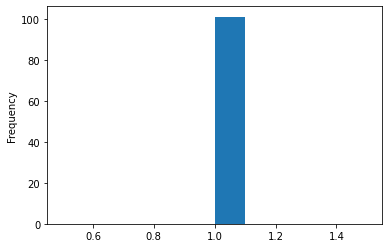

count                     101
unique                    101
top       2020-04-13 00:00:00
freq                        1
first     2020-01-02 00:00:00
last      2020-12-31 00:00:00
Name: DateTime, dtype: object


Daily News Sentiment Distribution:


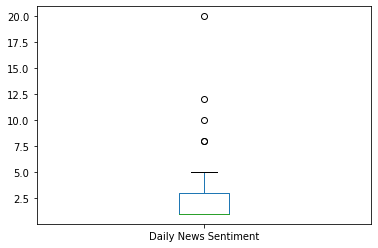

count    101.000000
mean      -0.198218
std        0.228173
min       -0.800000
25%       -0.350000
50%       -0.200000
75%       -0.100000
max        0.300000
Name: Daily News Sentiment, dtype: float64


---------------------------------------------------
CRUDE-OIL-COMMODITY-PRICES-2020



Group By: Commodity And Exchange


Value                                            \
                              count      mean        std    min    25%    50%   
Commodity And Exchange                                                          
BRENT CRUDE OIL                11.0     41.61      10.95  23.34  36.46  41.09   
DUBAI CRUDE OIL                11.0     41.50      10.82  23.38  36.72  41.10   
ICE BRENT CRUDE OIL FUTURES   972.0  68923.59  149145.06 -10.91   2.00  42.38   
NYMEX CRUDE OIL FUTURES      1009.0  72831.31  145283.41 -37.63  12.78  40.64   
WTI CRUDE OIL                  11.0     38.71      10.89  16.81  34.09  39.61   

                                                  
                                  75%        max  
Commodity And Exchange                            
BRENT CRUDE OIL                 43.74      63.60  
DUBAI CRUDE OIL                 43.18      63.73  
ICE BRENT CRUDE OIL FUTURES     58.62  658933.00  
NYMEX CRUDE OIL FUTURES      13044.00  634727.00  
WTI CRUDE OIL                   41.94      57.71

Group By: Indicator


Value                                             \
                            count       mean        std       min        25%   
Indicator                                                                      
CHANGE                      506.0       0.52       3.56    -10.91      -0.35   
OPEN                        512.0      41.43      10.68    -14.00      37.22   
PREV# DAY OPEN INTEREST     198.0  338239.01  134509.81  65624.00  236055.00   
PREVIOUS DAY OPEN INTEREST  253.0  290381.69  144953.72  13044.00  190103.00   
SETTLE                      512.0      41.31      10.96    -37.63      37.28   
VALUE                        33.0      40.61      10.63     16.81      33.75   

                                                             
                                  50%        75%        max  
Indicator                                                    
CHANGE                           0.32       0.93      55.90  
OPEN                            41.60      46.74      71.22  
PREV# DAY OPEN INTEREST     341588.00  439636.50  658933.00  
PREVIOUS DAY OPEN INTEREST  303081.00  393192.00  634727.00  
SETTLE                          41.70      46.76      68.91  
VALUE                           40.75      43.22      63.73

{'Sub-Sector': 'COMMODITY PRICES',
 'Super Region': 'GLOBAL DATA',
 'Frequency': 'DAILY',
 'Source': 'COMMODITY EXCHANGE'}

,Value,Date,Commodity And Exchange,Indicator
0,0.12,2020-12-31,NYMEX CRUDE OIL FUTURES,CHANGE
1,364939.00,2020-12-31,NYMEX CRUDE OIL FUTURES,PREVIOUS DAY OPEN INTEREST
2,48.35,2020-12-31,NYMEX CRUDE OIL FUTURES,OPEN
3,48.52,2020-12-31,NYMEX CRUDE OIL FUTURES,SETTLE
4,0.17,2020-12-31,ICE BRENT CRUDE OIL FUTURES,CHANGE
...,...,...,...,...
2009,61.60,2020-01-02,NYMEX CRUDE OIL FUTURES,OPEN
2010,61.18,2020-01-02,NYMEX CRUDE OIL FUTURES,SETTLE
2011,66.25,2020-01-02,ICE BRENT CRUDE OIL FUTURES,SETTLE
2012,66.41,2020-01-02,ICE BRENT CRUDE OIL FUTURES,OPEN


Value Distribution:


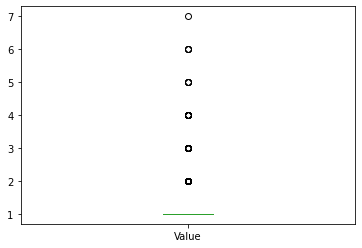

count      2014.000000
mean      69752.660437
std      146232.528589
min         -37.630000
25%           5.545000
50%          41.290000
75%          59.547500
max      658933.000000
Name: Value, dtype: float64


Date Distribution:


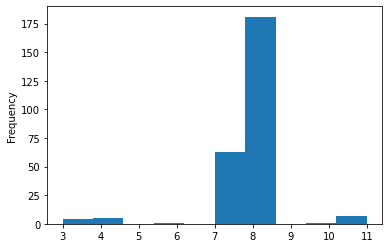

count                    2014
unique                    262
top       2020-09-30 00:00:00
freq                       11
first     2020-01-02 00:00:00
last      2020-12-31 00:00:00
Name: Date, dtype: object


---------------------------------------------------
CRUDE-OIL-RELATED-PRODUCT-FUTURE-PRICES-FROM-ICE-2020



Group By: Exchange City


Product Id                                                \
                   count      mean      std      min      25%      50%   
Exchange City                                                            
LONDON           13671.0   8371.87  8994.02     10.0   2466.0   4170.0   
NEW YORK          1275.0  20036.00     0.00  20036.0  20036.0  20036.0   
SINGAPORE        44154.0   5333.40  6114.16     20.0   2024.0   3190.0   

                                   Value                                     \
                   75%      max    count   mean     std    min   25%    50%   
Exchange City                                                                 
LONDON         19473.0  23623.0  13671.0  96.66  153.89 -16.80 -2.10  37.59   
NEW YORK       20036.0  20036.0   1275.0  -1.82    1.54  -9.27 -2.48  -1.42   
SINGAPORE       5629.0  23493.0  44154.0  46.83  112.31 -30.50 -2.91   0.10   

                              
                 75%     max  
Exchange City                 
LONDON         49.28  535.35  
NEW YORK       -0.82    0.16  
SINGAPORE      37.75  474.03

Group By: Product Type


Product Id                              \
                                    count      mean      std      min   
Product Type                                                            
CRUDE OIL AND REFINED             43522.0   5156.46  5977.05     20.0   
CRUDE OIL AND REFINED PRODUCTS    14303.0   8775.99  8994.00     10.0   
OIL                                1275.0  20036.00     0.00  20036.0   

                                                                      Value  \
                                    25%      50%      75%      max    count   
Product Type                                                                  
CRUDE OIL AND REFINED            1886.0   3190.0   5515.0  23493.0  43522.0   
CRUDE OIL AND REFINED PRODUCTS   2469.0   4672.0  19327.0  23623.0  14303.0   
OIL                             20036.0  20036.0  20036.0  20036.0   1275.0   

                                                                            \
                                  mean     std    min   25%    50%     75%   
Product Type                                                                 
CRUDE OIL AND REFINED            42.97  106.99 -30.50 -3.00  -0.04   36.03   
CRUDE OIL AND REFINED PRODUCTS  106.20  159.82 -16.80 -1.85  40.11  200.30   
OIL                              -1.82    1.54  -9.27 -2.48  -1.42   -0.82   

                                        
                                   max  
Product Type                            
CRUDE OIL AND REFINED           474.03  
CRUDE OIL AND REFINED PRODUCTS  535.35  
OIL                               0.16

Group By: Exchange Country


Product Id                                       \
                              count      mean      std      min      25%   
Exchange Country                                                           
SINGAPORE                   44154.0   5333.40  6114.16     20.0   2024.0   
UNITED KINGDOM              13671.0   8371.87  8994.02     10.0   2466.0   
UNITED STATES OF AMERICA     1275.0  20036.00     0.00  20036.0  20036.0   

                                                       Value                 \
                              50%      75%      max    count   mean     std   
Exchange Country                                                              
SINGAPORE                  3190.0   5629.0  23493.0  44154.0  46.83  112.31   
UNITED KINGDOM             4170.0  19473.0  23623.0  13671.0  96.66  153.89   
UNITED STATES OF AMERICA  20036.0  20036.0  20036.0   1275.0  -1.82    1.54   

                                                             
                            min   25%    50%    75%     max  
Exchange Country                                             
SINGAPORE                -30.50 -2.91   0.10  37.75  474.03  
UNITED KINGDOM           -16.80 -2.10  37.59  49.28  535.35  
UNITED STATES OF AMERICA  -9.27 -2.48  -1.42  -0.82    0.16

{'Sub-Sector': 'ENERGY FUTURES PRICES',
 'Super Region': 'GLOBAL DATA',
 'Sector': 'FINANCIAL MARKET',
 'Time Level': 'DAILY',
 'Unit': 'PRICE',
 'Source': 'INTERCONTINENTAL EXCHANGE - ICE',
 'Super Region.1': 'GLOBAL DATA',
 'Period Value': 'd'}

,Product Id,ProductID_Contract,Exchange City,Product Type,Exchange Country,Product Description,Value,Date Value
0,1886,1886_JUN21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,NAPHTHA C+F JAPAN CARGO SWAP,455.28,2020-12-31
1,5631,5631_FEB21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,URALS MED VS DATED BRENT SWAP,-0.40,2020-12-31
2,5631,5631_APR21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,URALS MED VS DATED BRENT SWAP,-1.00,2020-12-31
3,20031,20031_APR21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,SINGAPORE GASOIL SWAP,56.73,2020-12-31
4,23490,23490_MAR21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,MARINE FUEL 0.5% FOB ROTTERDAM BARGE SWAP,370.50,2020-12-31
...,...,...,...,...,...,...,...,...
59095,20031,20031_JUL20,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,SINGAPORE GASOIL SWAP,79.24,2020-01-03
59096,20031,20031_NOV20,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,SINGAPORE GASOIL SWAP,77.84,2020-01-03
59097,20031,20031_DEC20,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,SINGAPORE GASOIL SWAP,77.46,2020-01-03
59098,20031,20031_JAN21,SINGAPORE,CRUDE OIL AND REFINED,SINGAPORE,SINGAPORE GASOIL SWAP,77.13,2020-01-03


Product Id Distribution:


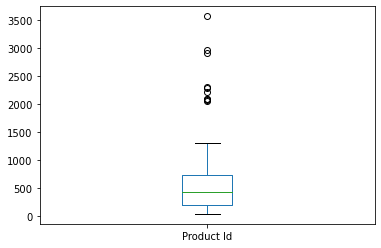

count    59100.000000
mean      6353.443046
std       7238.684367
min         10.000000
25%       2030.000000
50%       3193.000000
75%       5629.000000
max      23623.000000
Name: Product Id, dtype: float64


ProductID_Contract Distribution:


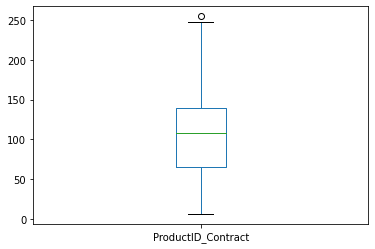

count           59100
unique            555
top       20031_JAN21
freq              255
Name: ProductID_Contract, dtype: object


Product Description Distribution:


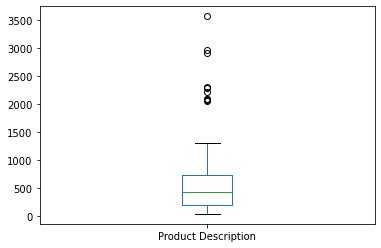

count                                         59100
unique                                           84
top       USGC HSFO FUEL OIL VS BRENT 1ST LINE SWAP
freq                                           3568
Name: Product Description, dtype: object


Value Distribution:


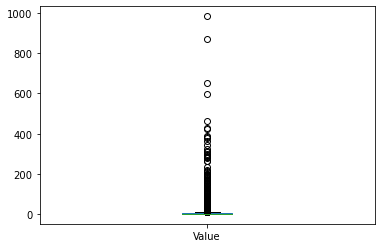

count    59100.000000
mean        57.308513
std        124.162466
min        -30.500000
25%         -2.550000
50%          0.880000
75%         43.000000
max        535.350000
Name: Value, dtype: float64


Date Value Distribution:


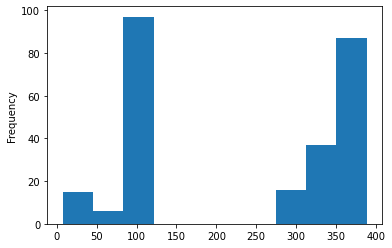

count                   59100
unique                    258
top       2020-11-04 00:00:00
freq                      389
first     2020-01-03 00:00:00
last      2020-12-31 00:00:00
Name: Date Value, dtype: object


---------------------------------------------------
NYSE-ENERGY-COMPANY-STOCK-CLOSING-PRICES-2020



Group By: Ticker


Value                                                    
        count    mean    std    min    25%    50%     75%     max
Ticker                                                           
BP      262.0   24.22   6.33  14.90  20.52  23.00   24.76   39.85
COP     254.0   41.69   9.63  24.39  34.88  39.98   43.95   66.48
CVX     249.0   88.58  13.12  53.63  81.64  88.36   93.34  121.43
MPC     249.0   37.81   9.97  16.61  31.12  36.81   41.22   61.91
MRO     249.0    6.44   2.62   3.18   4.53   5.74    6.80   13.96
OXY     248.0   19.41  10.93   8.88  12.37  15.45   19.40   47.26
PSX     248.0   68.38  15.30  42.32  58.17  65.21   75.13  112.20
PXD     248.0  101.90  21.58  59.15  88.13  96.78  111.64  158.11
VLO     248.0   58.86  14.66  32.97  49.70  56.34   65.60   96.89
XOM     247.0   44.75   9.72  31.47  38.14  43.14   46.67   70.90

Group By: Stock Name


Value                                      \
                                   count    mean    std    min    25%    50%   
Stock Name                                                                     
BP P.L.C.                          262.0   24.22   6.33  14.90  20.52  23.00   
CHEVRON CORPORATION                249.0   88.58  13.12  53.63  81.64  88.36   
CONOCOPHILLIPS                     254.0   41.69   9.63  24.39  34.88  39.98   
EXXON MOBIL CORPORATION            247.0   44.75   9.72  31.47  38.14  43.14   
MARATHON OIL CORPORATION           249.0    6.44   2.62   3.18   4.53   5.74   
MARATHON PETROLEUM CORPORATION     249.0   37.81   9.97  16.61  31.12  36.81   
OCCIDENTAL PETROLEUM CORPORATION   248.0   19.41  10.93   8.88  12.37  15.45   
PHILLIPS 66                        248.0   68.38  15.30  42.32  58.17  65.21   
PIONEER NATURAL RESOURCES COMPANY  248.0  101.90  21.58  59.15  88.13  96.78   
VALERO ENERGY CORPORATION          248.0   58.86  14.66  32.97  49.70  56.34   

                                                   
                                      75%     max  
Stock Name                                         
BP P.L.C.                           24.76   39.85  
CHEVRON CORPORATION                 93.34  121.43  
CONOCOPHILLIPS                      43.95   66.48  
EXXON MOBIL CORPORATION             46.67   70.90  
MARATHON OIL CORPORATION             6.80   13.96  
MARATHON PETROLEUM CORPORATION      41.22   61.91  
OCCIDENTAL PETROLEUM CORPORATION    19.40   47.26  
PHILLIPS 66                         75.13  112.20  
PIONEER NATURAL RESOURCES COMPANY  111.64  158.11  
VALERO ENERGY CORPORATION           65.60   96.89

{'Super Region': 'GLOBAL DATA',
 'Time Level': 'DAILY',
 'Source': 'WORLDDATA.AI',
 'Sub-Sector': 'GLOBAL STOCK EXCHANGE DATA',
 'Stock Attribute': 'CLOSING PRICE',
 'Currency': 'USD',
 'Data Provider': 'NEW YORK STOCK EXCHANGE',
 'Stock Exchange': 'NEW YORK STOCK EXCHANGE - STOCK PRICES',
 'Location': 'AMERICA-NEW_YORK'}

,Value,Date,Ticker,Stock Name
0,41.22,2020-12-31,XOM,EXXON MOBIL CORPORATION
1,41.36,2020-12-31,MPC,MARATHON PETROLEUM CORPORATION
2,69.94,2020-12-31,PSX,PHILLIPS 66
3,56.57,2020-12-31,VLO,VALERO ENERGY CORPORATION
4,17.31,2020-12-31,OXY,OCCIDENTAL PETROLEUM CORPORATION
...,...,...,...,...
2497,121.43,2020-01-02,CVX,CHEVRON CORPORATION
2498,38.14,2020-01-02,BP,BP P.L.C.
2499,65.46,2020-01-02,COP,CONOCOPHILLIPS
2500,152.34,2020-01-02,PXD,PIONEER NATURAL RESOURCES COMPANY


Value Distribution:


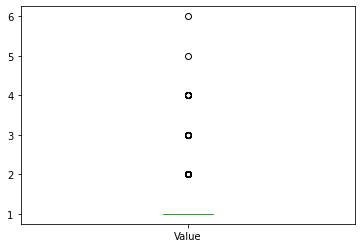

count    2502.000000
mean       49.040068
std        31.370197
min         3.180000
25%        23.692500
50%        42.320000
75%        69.222500
max       158.110000
Name: Value, dtype: float64


Date Distribution:


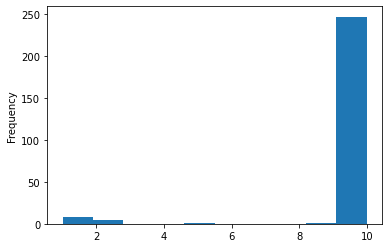

count                    2502
unique                    262
top       2020-09-01 00:00:00
freq                       10
first     2020-01-02 00:00:00
last      2020-12-31 00:00:00
Name: Date, dtype: object


---------------------------------------------------
OECD-INTEREST-RATES



Group By: Region


Value                                            
                         count  mean   std   min   25%   50%    75%    max
Region                                                                    
CHINA                    145.0  4.53  1.51  1.15  3.23  4.61   5.66   7.47
EURO AREA(16 COUNTRIES)  168.0  2.40  1.80 -0.33  0.90  2.26   4.06   5.62
EURO AREA(17 COUNTRIES)  168.0  2.33  1.87 -0.40  0.65  2.26   4.07   5.62
EURO AREA(19 COUNTRIES)  168.0  2.35  1.86 -0.52  0.68  2.28   4.15   5.62
INDIA                    235.0  7.27  1.23  3.14  6.46  7.39   8.00  11.49
RUSSIA                   156.0  9.80  5.57  4.23  7.13  8.24  10.20  50.19
UNITED STATES            336.0  2.67  1.73  0.11  1.26  2.40   4.14   6.66

Group By: Indicator


Value                                      \
                                    count  mean   std   min   25%   50%   75%   
Indicator                                                                       
LONG-TERM INTEREST RATES            278.0  5.82  5.10 -0.05  2.92  4.58  7.78   
LONG-TERM INTEREST RATES FORECAST   336.0  4.31  2.40 -0.01  2.56  4.08  5.62   
SHORT-TERM INTEREST RATES           347.0  4.23  3.74 -0.52  1.25  3.36  6.51   
SHORT-TERM INTEREST RATES FORECAST  415.0  3.48  2.65 -0.40  0.84  3.65  5.84   

                                           
                                      max  
Indicator                                  
LONG-TERM INTEREST RATES            50.19  
LONG-TERM INTEREST RATES FORECAST   11.49  
SHORT-TERM INTEREST RATES           21.14  
SHORT-TERM INTEREST RATES FORECAST   9.00

{'Sub-Sector': 'INTEREST RATES',
 'Super Region': 'GLOBAL DATA',
 'Measure': 'PERCENT PER ANNUM',
 'Frequency': 'Q',
 'Source': 'OECD',
 'Subject': 'TOTAL'}

,Value,Date,Region,Indicator
0,1.64,2020-12-31,EURO AREA(16 COUNTRIES),LONG-TERM INTEREST RATES FORECAST
1,4.35,2020-12-31,CHINA,SHORT-TERM INTEREST RATES FORECAST
2,6.30,2020-12-31,INDIA,LONG-TERM INTEREST RATES FORECAST
3,0.28,2020-12-31,EURO AREA(16 COUNTRIES),SHORT-TERM INTEREST RATES FORECAST
4,1.77,2020-12-31,UNITED STATES,SHORT-TERM INTEREST RATES FORECAST
...,...,...,...,...
1371,6.03,2000-03-31,UNITED STATES,SHORT-TERM INTEREST RATES
1372,5.62,2000-03-31,EURO AREA(19 COUNTRIES),LONG-TERM INTEREST RATES
1373,19.97,2000-03-31,RUSSIA,SHORT-TERM INTEREST RATES
1374,50.19,2000-03-31,RUSSIA,LONG-TERM INTEREST RATES


Value Distribution:


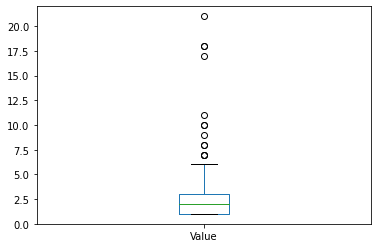

count    1376.000000
mean        4.345974
std         3.596752
min        -0.520000
25%         1.830000
50%         4.150000
75%         6.250000
max        50.190000
Name: Value, dtype: float64


Date Distribution:


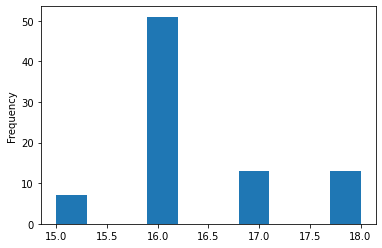

count                    1376
unique                     84
top       2012-06-30 00:00:00
freq                       18
first     2000-03-31 00:00:00
last      2020-12-31 00:00:00
Name: Date, dtype: object


---------------------------------------------------
SOME-ENERGY-COMPANY-FINANCIAL-STATEMENTS-2020

Group By: Ticker


Value                                                         \
       count          mean           std           min          25%   
Ticker                                                                
COP     55.0  3.614606e+08  1.291820e+09 -1.739000e+09        -0.27   
CVX     56.0  1.820124e+09  6.790743e+09 -1.060000e+10        -0.51   
EOG     52.0  2.545249e+08  1.002203e+09 -1.145262e+09        -0.83   
MPC     52.0  5.874231e+08  6.755472e+09 -1.215500e+10        -3.92   
MRO     51.0  4.994118e+07  4.157164e+08 -7.650000e+08  -9000000.00   
OXY     27.0  3.746815e+08  1.880702e+09 -2.232000e+09        -2.49   
PSX     81.0  9.759017e+08  4.295953e+09 -3.436000e+09 -51000000.00   
PXD     52.0  1.393846e+08  4.661756e+08 -5.380000e+08        -0.40   
VLO     79.0  1.199329e+09  5.746472e+09 -1.480100e+10        -4.54   
XOM     52.0  3.776808e+09  1.121113e+10 -1.640000e+09 -64500000.32   

                                                
               50%           75%           max  
Ticker                                          
COP           0.50  2.785000e+08  6.111000e+09  
CVX           1.61  3.137000e+09  2.924400e+10  
EOG     4906500.31  2.270388e+08  4.701232e+09  
MPC           0.06  6.480000e+08  2.700300e+10  
MRO          -0.05  5.200000e+07  1.024000e+09  
OXY           0.02  8.375000e+08  6.410000e+09  
PSX          -0.01  3.840000e+08  2.087800e+10  
PXD           1.09  1.792500e+08  2.010000e+09  
VLO           0.12  4.070000e+08  3.100800e+10  
XOM           0.00  2.451500e+09  5.513400e+10

Group By: Unit


Value                                                          \
         count          mean           std           min           25%   
Unit                                                                     
NUMBER    42.0  1.058731e+09  1.145409e+09  1.650000e+08  4.387560e+08   
PERCENT  158.0 -9.000000e-02  5.900000e-01 -2.580000e+00 -2.800000e-01   
USD      357.0  1.431995e+09  6.682523e+09 -1.480100e+10 -3.410000e+08   

                                                   
                  50%           75%           max  
Unit                                               
NUMBER   6.480000e+08  1.077606e+09  4.271000e+09  
PERCENT -2.000000e-02  1.000000e-01  3.650000e+00  
USD      9.813000e+06  8.950000e+08  5.513400e+10

Group By: Company Name


Value                              \
                                  count          mean           std   
Company Name                                                          
CHEVRON CORPORATION                56.0  1.820124e+09  6.790743e+09   
CONOCOPHILLIPS                     55.0  3.614606e+08  1.291820e+09   
EOG RESOURCES INC.                 52.0  2.545249e+08  1.002203e+09   
EXXON MOBIL CORPORATION            52.0  3.776808e+09  1.121113e+10   
MARATHON OIL CORPORATION           51.0  4.994118e+07  4.157164e+08   
MARATHON PETROLEUM CORPORATION     52.0  5.874231e+08  6.755472e+09   
OCCIDENTAL PETROLEUM CORPORATION   27.0  3.746815e+08  1.880702e+09   
PHILLIPS 66                        81.0  9.759017e+08  4.295953e+09   
PIONEER NATURAL RESOURCES COMPANY  52.0  1.393846e+08  4.661756e+08   
VALERO ENERGY CORPORATION          79.0  1.199329e+09  5.746472e+09   

                                                                          \
                                            min          25%         50%   
Company Name                                                               
CHEVRON CORPORATION               -1.060000e+10        -0.51        1.61   
CONOCOPHILLIPS                    -1.739000e+09        -0.27        0.50   
EOG RESOURCES INC.                -1.145262e+09        -0.83  4906500.31   
EXXON MOBIL CORPORATION           -1.640000e+09 -64500000.32        0.00   
MARATHON OIL CORPORATION          -7.650000e+08  -9000000.00       -0.05   
MARATHON PETROLEUM CORPORATION    -1.215500e+10        -3.92        0.06   
OCCIDENTAL PETROLEUM CORPORATION  -2.232000e+09        -2.49        0.02   
PHILLIPS 66                       -3.436000e+09 -51000000.00       -0.01   
PIONEER NATURAL RESOURCES COMPANY -5.380000e+08        -0.40        1.09   
VALERO ENERGY CORPORATION         -1.480100e+10        -4.54        0.12   

                                                               
                                            75%           max  
Company Name                                                   
CHEVRON CORPORATION                3.137000e+09  2.924400e+10  
CONOCOPHILLIPS                     2.785000e+08  6.111000e+09  
EOG RESOURCES INC.                 2.270388e+08  4.701232e+09  
EXXON MOBIL CORPORATION            2.451500e+09  5.513400e+10  
MARATHON OIL CORPORATION           5.200000e+07  1.024000e+09  
MARATHON PETROLEUM CORPORATION     6.480000e+08  2.700300e+10  
OCCIDENTAL PETROLEUM CORPORATION   8.375000e+08  6.410000e+09  
PHILLIPS 66                        3.840000e+08  2.087800e+10  
PIONEER NATURAL RESOURCES COMPANY  1.792500e+08  2.010000e+09  
VALERO ENERGY CORPORATION          4.070000e+08  3.100800e+10

Group By: Industry Level 2


Value                              \
                                  count          mean           std   
Industry Level 2                                                      
OIL & GAS - E&P                   210.0  2.043363e+08  8.857952e+08   
OIL & GAS - INTEGRATED            135.0  2.284721e+09  8.315047e+09   
OIL & GAS - REFINING & MARKETING  212.0  9.638728e+08  5.503702e+09   

                                                                          \
                                           min   25%   50%           75%   
Industry Level 2                                                           
OIL & GAS - E&P                  -1.739000e+09 -0.92  0.26  2.172935e+08   
OIL & GAS - INTEGRATED           -1.060000e+10 -0.54  0.20  1.991324e+09   
OIL & GAS - REFINING & MARKETING -1.480100e+10 -7.81  0.02  4.072500e+08   

                                                
                                           max  
Industry Level 2                                
OIL & GAS - E&P                   6.111000e+09  
OIL & GAS - INTEGRATED            5.513400e+10  
OIL & GAS - REFINING & MARKETING  3.100800e+10

Group By: Company Website


Value                              \
                                    count          mean           std   
Company Website                                                         
HTTP://WWW.CHEVRON.COM               56.0  1.820124e+09  6.790743e+09   
HTTP://WWW.CONOCOPHILLIPS.COM        55.0  3.614606e+08  1.291820e+09   
HTTP://WWW.CORPORATE.EXXONMOBIL.COM  52.0  3.776808e+09  1.121113e+10   
HTTP://WWW.EOGRESOURCES.COM          52.0  2.545249e+08  1.002203e+09   
HTTP://WWW.MARATHONOIL.COM           51.0  4.994118e+07  4.157164e+08   
HTTP://WWW.MARATHONPETROLEUM.COM     52.0  5.874231e+08  6.755472e+09   
HTTP://WWW.OXY.COM                   27.0  3.746815e+08  1.880702e+09   
HTTP://WWW.PHILLIPS66.COM            81.0  9.759017e+08  4.295953e+09   
HTTP://WWW.PXD.COM                   52.0  1.393846e+08  4.661756e+08   
HTTP://WWW.VALERO.COM                79.0  1.199329e+09  5.746472e+09   

                                                                            \
                                              min          25%         50%   
Company Website                                                              
HTTP://WWW.CHEVRON.COM              -1.060000e+10        -0.51        1.61   
HTTP://WWW.CONOCOPHILLIPS.COM       -1.739000e+09        -0.27        0.50   
HTTP://WWW.CORPORATE.EXXONMOBIL.COM -1.640000e+09 -64500000.32        0.00   
HTTP://WWW.EOGRESOURCES.COM         -1.145262e+09        -0.83  4906500.31   
HTTP://WWW.MARATHONOIL.COM          -7.650000e+08  -9000000.00       -0.05   
HTTP://WWW.MARATHONPETROLEUM.COM    -1.215500e+10        -3.92        0.06   
HTTP://WWW.OXY.COM                  -2.232000e+09        -2.49        0.02   
HTTP://WWW.PHILLIPS66.COM           -3.436000e+09 -51000000.00       -0.01   
HTTP://WWW.PXD.COM                  -5.380000e+08        -0.40        1.09   
HTTP://WWW.VALERO.COM               -1.480100e+10        -4.54        0.12   

                                                                 
                                              75%           max  
Company Website                                                  
HTTP://WWW.CHEVRON.COM               3.137000e+09  2.924400e+10  
HTTP://WWW.CONOCOPHILLIPS.COM        2.785000e+08  6.111000e+09  
HTTP://WWW.CORPORATE.EXXONMOBIL.COM  2.451500e+09  5.513400e+10  
HTTP://WWW.EOGRESOURCES.COM          2.270388e+08  4.701232e+09  
HTTP://WWW.MARATHONOIL.COM           5.200000e+07  1.024000e+09  
HTTP://WWW.MARATHONPETROLEUM.COM     6.480000e+08  2.700300e+10  
HTTP://WWW.OXY.COM                   8.375000e+08  6.410000e+09  
HTTP://WWW.PHILLIPS66.COM            3.840000e+08  2.087800e+10  
HTTP://WWW.PXD.COM                   1.792500e+08  2.010000e+09  
HTTP://WWW.VALERO.COM                4.070000e+08  3.100800e+10



Group By: Date Value


Value                                                          \
            count          mean           std           min           25%   
Date Value                                                                  
2020-03-31  266.0  1.264858e+09  6.281727e+09 -1.215500e+10 -3.000000e-01   
2020-06-30  239.0  6.924597e+08  3.985383e+09 -1.060000e+10 -1.540000e+00   
2020-09-30   52.0  1.033439e+09  6.099932e+09 -1.480100e+10 -3.790000e+08   

                                             
             50%          75%           max  
Date Value                                   
2020-03-31  0.35  440008750.0  5.513400e+10  
2020-06-30  0.09  407000000.0  3.227700e+10  
2020-09-30 -0.03  210250000.0  3.100800e+10

{'Super Region': 'UNITED STATES',
 'Sector': 'FINANCIAL MARKET',
 'Time Level': 'QUARTER',
 'Source': 'COMPANY SEC FILINGS',
 'Exchange': 'NEW YORK STOCK EXCHANGE',
 'Sub-Sector': 'FINANCIAL STATEMENT',
 'Industry Level 1': 'ENERGY',
 'Statement Type': 'INCOME-STATEMENT',
 'Market Cap': 'GREATER THAN $1BILLION MARKET CAP',
 'Super Region.1': 'UNITED STATES',
 'Period Value': 'd'}

,Ticker,Unit,Company Name,Industry Level 2,Company Website,Financial Metric,Value,Date Value
0,VLO,USD,VALERO ENERGY CORPORATION,OIL & GAS - REFINING & MARKETING,HTTP://WWW.VALERO.COM,INCOME TAX EXPENSE,-3.370000e+08,2020-09-30
1,VLO,USD,VALERO ENERGY CORPORATION,OIL & GAS - REFINING & MARKETING,HTTP://WWW.VALERO.COM,EPS,-2.620000e+00,2020-09-30
2,VLO,USD,VALERO ENERGY CORPORATION,OIL & GAS - REFINING & MARKETING,HTTP://WWW.VALERO.COM,OPERATING INCOME,-6.210000e+08,2020-09-30
3,PSX,USD,PHILLIPS 66,OIL & GAS - REFINING & MARKETING,HTTP://WWW.PHILLIPS66.COM,GROSS PROFIT,1.068000e+09,2020-09-30
4,PSX,USD,PHILLIPS 66,OIL & GAS - REFINING & MARKETING,HTTP://WWW.PHILLIPS66.COM,EPS DILUTED,-1.820000e+00,2020-09-30
...,...,...,...,...,...,...,...,...
552,XOM,PERCENT,EXXON MOBIL CORPORATION,OIL & GAS - INTEGRATED,HTTP://WWW.CORPORATE.EXXONMOBIL.COM,NET PROFIT MARGIN,-1.000000e-02,2020-03-31
553,XOM,PERCENT,EXXON MOBIL CORPORATION,OIL & GAS - INTEGRATED,HTTP://WWW.CORPORATE.EXXONMOBIL.COM,GROSS MARGIN,1.600000e-01,2020-03-31
554,XOM,USD,EXXON MOBIL CORPORATION,OIL & GAS - INTEGRATED,HTTP://WWW.CORPORATE.EXXONMOBIL.COM,INTEREST EXPENSE,2.490000e+08,2020-03-31
555,XOM,USD,EXXON MOBIL CORPORATION,OIL & GAS - INTEGRATED,HTTP://WWW.CORPORATE.EXXONMOBIL.COM,REVENUE,5.513400e+10,2020-03-31


Financial Metric Distribution:


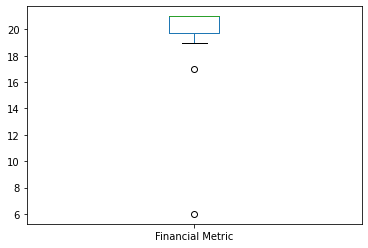

count                    557
unique                    28
top       OPERATING EXPENSES
freq                      21
Name: Financial Metric, dtype: object


Value Distribution:


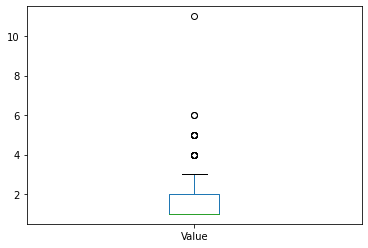

count    5.570000e+02
mean     9.976463e+08
std      5.393864e+09
min     -1.480100e+10
25%     -1.530000e+00
50%      1.300000e-01
75%      4.070000e+08
max      5.513400e+10
Name: Value, dtype: float64


---------------------------------------------------
SOME-STOCK-MARKET-INDICATORS-&-INDEX-2020



Group By: Description


Value                               \
                                  count      mean      std       min   
Description                                                            
DOW JONES COMPOSITE AVERAGE       253.0   8848.42   898.54   6100.31   
DOW JONES INDUSTRIAL AVERAGE      253.0  26890.67  2521.70  18591.93   
DOW JONES TRANSPORTATION AVERAGE  253.0  10254.66  1593.88   6703.63   
DOW JONES UTILITY AVERAGE         253.0    832.43    61.11    610.89   
S&P 500                           253.0   3217.86   319.23   2237.40   

                                                                          
                                       25%       50%       75%       max  
Description                                                               
DOW JONES COMPOSITE AVERAGE        8271.80   9106.56   9550.49  10108.71  
DOW JONES INDUSTRIAL AVERAGE      25595.80  27480.03  28823.77  30606.48  
DOW JONES TRANSPORTATION AVERAGE   9010.92  10864.94  11391.91  12803.02  
DOW JONES UTILITY AVERAGE           795.09    826.52    875.22    960.89  
S&P 500                            3036.13   3276.02   3408.63   3756.07

{'Sub-Sector': 'STOCK MARKET INDICATORS & INDEX',
 'Super Region': 'UNITED STATES',
 'Time Level': 'DAILY',
 'Category 2': 'FINANCIAL INDICATORS',
 'Seasonal Adjustment': 'NOT SEASONALLY ADJUSTED',
 'Unit': 'INDEX',
 'Source': 'FEDERAL RESERVE ECONOMIC DATA-FRED'}

,Value,Date,Description
0,864.64,2020-12-31,DOW JONES UTILITY AVERAGE
1,3756.07,2020-12-31,S&P 500
2,10108.71,2020-12-31,DOW JONES COMPOSITE AVERAGE
3,30606.48,2020-12-31,DOW JONES INDUSTRIAL AVERAGE
4,12506.93,2020-12-31,DOW JONES TRANSPORTATION AVERAGE
...,...,...,...
1260,866.82,2020-01-02,DOW JONES UTILITY AVERAGE
1261,3257.85,2020-01-02,S&P 500
1262,9446.78,2020-01-02,DOW JONES COMPOSITE AVERAGE
1263,28868.80,2020-01-02,DOW JONES INDUSTRIAL AVERAGE


Value Distribution:


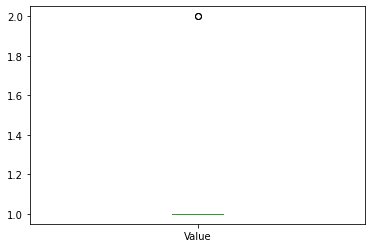

count     1265.000000
mean     10008.807123
std       9239.462509
min        610.890000
25%       3036.130000
50%       8408.050000
75%      11391.910000
max      30606.480000
Name: Value, dtype: float64


Date Distribution:


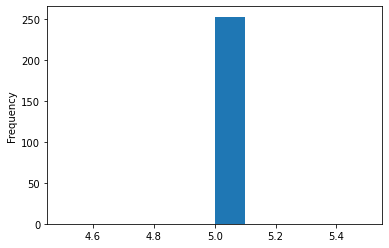

count                    1265
unique                    253
top       2020-10-16 00:00:00
freq                        5
first     2020-01-02 00:00:00
last      2020-12-31 00:00:00
Name: Date, dtype: object

In [414]:
# Import Operating System Module
import os
directory = '../data/'
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        raw_df = pd.read_csv(filepath, infer_datetime_format = True)
        print('---------------------------------------------------')
        print(filename[:-4].upper())
        print()
        df, redund_dict1 = preprocess_data(raw_df)
    else:
        continue

In [396]:
interestrates_df = pd.read_csv('../data/oecd-interest-rates.csv', infer_datetime_format = True)

In [397]:
def preprocess_data( df ):
    
    redund_dict = {} # key = column name, value = redundant data value
    data_list = []  # List to keep track of most important data stored in dataset

    
    # Try to identify the date column
    for col in df.columns:
        if col.lower().find('date') != -1:
            date_col = col
            df[date_col] = pd.to_datetime(df[date_col])#, format = '%Y/%m/%d')
    
    # Drop redundant columns and store redundant data more efficiently
    for col in df:
        # Identify columns with only one value repeated on every row
        value_counts = df[col].value_counts().count()
        # Reduce DataFrame if any columns contain only one value
        if value_counts == 1:
            k = col # keys
            v = df[col].value_counts().index[0] # values
            # Store redundant data in a dictionary
            redund_dict.update({k : v})
            # Drop redundant data columns
            df.drop(columns=[col], inplace = True)
        
        # Categorical data to groupby and explore
        elif value_counts <= 10:
            print(f'Group By: {col}')
            display(round(df.groupby([col]).describe(), 2))
            
        # Identify most important data stored in dataset
        else:
            data_list.append(col)
            #boxplot = df[col].value_counts().plot(kind='box');
            #display(boxplot, df[col].describe())
            print()
            
    # Display returned objects      
    display(redund_dict)
    display(df)
    
    # Identify columns with many values observed
    for col in data_list:
        plt.figure()
        # Create visuals of data distributions
        if df[col].dtypes == '<M8[ns]': # 'datetime64[ns]': 
            df[col].value_counts().sort_index().plot(kind='hist');
        else:
            df[col].value_counts().plot(kind='box');
            
        # Display "subplots"
        print(f'{col} Distribution:')
        plt.show()
        display(df[col].describe())
        print()
        
    return df, redund_dict

In [407]:
#df , redund_dict1 = preprocess_data(interestrates_df)

In [368]:
df['Date'].dt.day.value_counts().sort_index()
df['Date'].dt.month.value_counts().sort_index()
df['Date'].dt.year.value_counts().sort_index()

2000    60
2001    63
2002    64
2003    64
2004    64
2005    64
2006    64
2007    64
2008    64
2009    64
2010    64
2011    64
2012    72
2013    72
2014    72
2015    69
2016    68
2017    68
2018    66
2019    64
2020    62
Name: Date, dtype: int64